EXPLORING GLOBAL HEALTH, POVERTY AND ECONOMIC INDICATORS

Summary of Contents:
1. Introduction
2. Data Sources
3. Initial Data Inspection & Cleaning
4. Data Analysis & Answers to the Questions
5. Future Research
6. References

1. Introduction
This report will be analyzing the socioeconomic trends and relationships across different countries over a time period of as early as 1980 to 2020. This notebook will focus on understanding the correlation between mutliple economic factors and draw conclusions about the relationships between them and what they may mean. In this report we'll clean and filter raw data, visualize trends and draw conclusions based on correlation and relationships between multiple economic factors.

Questions to be answered:
Q1) What is the correlation between health expenditure (as a percentage of GDP) and life expectancy across countries?
Q2) How does unemployment rate vary with inflation across countries?
Q3) Which 10 countries have the highest rates of homicides per 100,000 people, and how do their GDP levels compare?
Q4) What is the relationship between poverty rates (MPI) and GDP per capita, and how does this vary by country size?
Q5) What is the population growth trend over time in countries with the highest vs. lowest life expectancy?
Q6) Which countries have the highest number of people living in extreme poverty, and how does this compare to their GDP levels?

Data Files
A variety of data files are required for this analysis. Their source and a summary of the data they contain are listed below. All data files have been obtained from The World Bank Group (DataBank).

Popular_Indicators.csv https://databank.worldbank.org/source/world-development-indicators

The following data columns used in this project are:
- Population, Total
- GDP
- Population Growth (Annual %)
- Life Expectancy
- Poverty Headcount Ratio

Homicide_UnemploymentRates.csv https://databank.worldbank.org/Crime-rate/id/e67da82#
The source of this data is from the UN Office on Drugs and Crime's International Homicide Statistics database and the International Labour Organization. Every country from the available list was selected (208) for the maximum time period available (1998-2021).

The following data columns used in this project are:
- Homicide per 100,000
- Unemployment Rate (% of total labor force)

Literacy_Rates.csv https://databank.worldbank.org/source/world-development-indicators#
The source of this data is from the UNESCO Institute for Statistics (UIS) and looks at the percentage of people over 15 and above who can both read and write.

The following data columns used in this project are:
- Literacy rate, adult total (% of people ages 15 and above)

2. Summary of Files
Overall there is a complex relationship between the metrics viewed in this analysis. Something about how these are constantly shifting and evolving over time and each country has extremely deep and complex variations that can skew results and change future results. Further analysis incorporating more data such as geopolitics, policy etc could yield different and more accurate results however this analysis serves as a good proxy for how these data points are connected to each other on a surface level view.

3. Data Inspection & Cleaning
Because this data has come from the same reputable source, we can assume there are no issues with the data itself and can treat any outliers as accurate information, however, it's still good practice to check and ensure the data is clean before any analysis is done. In this section we will import the files mentioned above and inpsect and clean the data as required.

In [165]:
#import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

3.1 Once we load in all the modules required we can begin the cleaning of the data by an initial inspection of what the raw data contains:

In [166]:
#load in the data files
population_data = pd.read_csv("Population_Indicators.csv")
literacy_data = pd.read_csv("Literacy_Rates.csv")
crime_data = pd.read_csv("Homicide_UnemploymentRate.csv")

#get an overall view for each dataset
print("Population Indicators Summary")
print(population_data.info())  # Data types and non-null counts
print(population_data.describe())  # Summary statistics for numerical columns
print(population_data.head())  # Preview the first few rows

print("\nLiteracy Rates Summary")
print(literacy_data.info())
print(literacy_data.describe())
print(literacy_data.head())

print("\nHomicide and Unemployment Rates Summary")
print(crime_data.info())
print(crime_data.describe())
print(crime_data.head())

Population Indicators Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    3691 non-null   object
 1   Series Code    3689 non-null   object
 2   Country Name   3689 non-null   object
 3   Country Code   3689 non-null   object
 4   1960 [YR1960]  3689 non-null   object
 5   1961 [YR1961]  3689 non-null   object
 6   1962 [YR1962]  3689 non-null   object
 7   1963 [YR1963]  3689 non-null   object
 8   1964 [YR1964]  3689 non-null   object
 9   1965 [YR1965]  3689 non-null   object
 10  1966 [YR1966]  3689 non-null   object
 11  1967 [YR1967]  3689 non-null   object
 12  1968 [YR1968]  3689 non-null   object
 13  1969 [YR1969]  3689 non-null   object
 14  1970 [YR1970]  3689 non-null   object
 15  1971 [YR1971]  3689 non-null   object
 16  1972 [YR1972]  3689 non-null   object
 17  1973 [YR1973]  3689 non-null   object
 18

3.2 Dataset Overview:
Overall, the data we're working with is quite good but needs some important minimal. Some standouts include:

Series Name: Has two extra counts in each file. Upon further investigation this is data that 1) shows the source of the data and 2) shows when it was last updated. For consistancy, we'll look to remove these from all datasets but this is not 100% necessary.

Yearly Data: The yearly data looks to be labelled confusingly (e.g. 1960 [YR1960]). These will be renamed this for simplicity and readability.

Additional unwanted columns and rows: All files are quite large (particularly Population_Indicators) and includes many unwanted rows and columns that we won't be working with for this data analysis and as such will look to remove these. They include:
Rows:
Series Code
Country Code (as we already have a country name column)
+ All other Series Names that are grouped data (e.g. Africa Eastern and Southern, Africa Western and Central, Lower Middle Inconme etc)

Columns:
Adolescent fertility rate (births per 1,000 women ages 15-19)
GNI per capita, Atlas method (current US$)
GNI per capita, PPP (current international $)
GNI, Atlas method (current US$)
GNI, PPP (current international $)
Gross capital formation (% of GDP)
Inflation, consumer prices (annual %)
Inflation, GDP deflator (annual %)
Primary completion rate, total (% of relevant age group)

Top Frequent Values: Many of the yearly columns have "..." across all files, which likely indicates missing data. These will have to be factored in when performing data analysis.

Missing Coutries: All three data files do not contain the same amount of countries. Population Indicators (217), Literacy Rates (266), Homicide Unemployment Rates (208). This will need to be considered when comparing coutnries across different DataFrames.

Missing Years: All three data files do not contain the same year range. Population Indicators (1960-2023), Literacy Rates (1960-2023), Homicide Unemployment Rates (1998-2022). This needs to be taken into consideration when utilizing Homicide and Unemployment Rate data.

3.3 Data Cleaning: Now that we have an understanding of what things in the 3 files need to be cleaned we can begin this process:

In [245]:
#define the first function to drop unwanted rows/columns and to rename
def clean_dataset(dataset, columns_to_drop, rows_to_drop, rename_values=None):
    # Drop unwanted columns
    dataset = dataset.drop(columns=columns_to_drop, errors="ignore")
    
    # Drop rows with specific unwanted values in the 'Country Name' column
    if 'Country Name' in dataset.columns:
        dataset = dataset[~dataset['Country Name'].isin(rows_to_drop)]
    
    # Rename year columns (e.g., "1960 [YR1960]" -> "1960")
    dataset.rename(columns=lambda x: x.split(' ')[0] if '[YR' in x else x, inplace=True)
    
    # Apply additional renaming of values in the 'Series Name' column if specified
    if rename_values:
        if 'Series Name' in dataset.columns:
            dataset['Series Name'] = dataset['Series Name'].replace(rename_values)
    
    return dataset

#define which columns and rows to drop across files
columns_to_drop = [
    "Series Code",
    "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    "GNI per capita, Atlas method (current US$)",
    "GNI per capita, PPP (current international $)",
    "GNI, Atlas method (current US$)",
    "GNI, PPP (current international $)",
    "Gross capital formation (% of GDP)",
    "Inflation, consumer prices (annual %)",
    "Inflation, GDP deflator (annual %)",
    "Primary completion rate, total (% of relevant age group)"
]

#rows to drop from 'Series Name'
rows_to_drop = [
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World", 
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend",
    "East Asia & Pacific", "East Asia & Pacific (excluding high income)", 
    "East Asia & Pacific (IDA & IBRD countries)", "Euro area", "Europe & Central Asia", 
    "Europe & Central Asia (excluding high income)", "Europe & Central Asia (IDA & IBRD countries)", 
    "European Union", "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", 
    "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", 
    "Late-demographic dividend", "Latin America & Caribbean", 
    "Latin America & Caribbean (excluding high income)", "Latin America & the Caribbean (IDA & IBRD countries)", 
    "Least developed countries: UN classification", "Low & middle income", "Low income", 
    "Lower middle income", "Middle East & North Africa", "Middle East & North Africa (excluding high income)", 
    "Middle East & North Africa (IDA & IBRD countries)", "Middle income", "North America", "Not classified", 
    "OECD members", "Other small states", "Pacific island small states", "Post-demographic dividend", 
    "Pre-demographic dividend", "Small states", "South Asia", "South Asia (IDA & IBRD)", 
    "Sub-Saharan Africa", "Sub-Saharan Africa (excluding high income)", 
    "Sub-Saharan Africa (IDA & IBRD countries)", "Upper middle income", "World"
]

#rename for readability and to avoid having to do this later
rename_values = {
    'Literacy rate, adult total (% of people ages 15 and above)': 'Adult Literacy Rate'
}

#apply the data cleaning changes to the datasets which will be used in the future
population_data_cleaned = clean_dataset(population_data, columns_to_drop, rows_to_drop, rename_values)
literacy_data_cleaned = clean_dataset(literacy_data, columns_to_drop, rows_to_drop, rename_values)
crime_data_cleaned = clean_dataset(crime_data, columns_to_drop, rows_to_drop)

#insopect the cleaned data for any issues
print("\nCleaned Population Data Head:")
print(population_data_cleaned.head())
print("\nCleaned Literacy Data Head:")
print(literacy_data_cleaned.head())
print("\nCleaned Crime Data Head:")
print(crime_data_cleaned.head())

#there are still lots of missing values so this will need to be cleaned
def handle_missing_values(dataset):
    #replace .. with 0 across all columns
    dataset = dataset.replace('..', 0)
    return dataset

# Convert columns to numeric where applicable
def convert_columns_to_numeric(dataset, start_index):
    # Convert columns starting from the given index to numeric values if applicable
    for col in dataset.columns[start_index:]:
        dataset[col] = pd.to_numeric(dataset[col], errors='coerce').fillna(0).astype(float)
    return dataset

#apply latest cleaning to dataframe
population_data_cleaned = convert_columns_to_numeric(population_data_cleaned, 3)
literacy_data_cleaned = convert_columns_to_numeric(literacy_data_cleaned, 3)
crime_data_cleaned = convert_columns_to_numeric(crime_data_cleaned, 3)

#double check no more cleaning is required before data analysis
print("\nPopulation Data")
print(population_data_cleaned.head())
print("\nAdult Literacy Data")
print(literacy_data_cleaned.head())
print("\nCrime Data")
print(crime_data_cleaned.head())
print("\nLiteracy Data")
print(literacy_data_cleaned.dtypes)


Cleaned Population Data Head:
         Series Name    Country Name Country Code        1960        1961  \
0  Population, total     Afghanistan          AFG   8622466.0   8790140.0   
1  Population, total         Albania          ALB   1608800.0   1659800.0   
2  Population, total         Algeria          DZA  11394307.0  11598608.0   
3  Population, total  American Samoa          ASM     20085.0     20626.0   
4  Population, total         Andorra          AND      9443.0     10216.0   

         1962        1963        1964        1965        1966  ...  \
0   8969047.0   9157465.0   9355514.0   9565147.0   9783147.0  ...   
1   1711319.0   1762621.0   1814135.0   1864791.0   1914573.0  ...   
2  11778260.0  11969451.0  12179099.0  12381256.0  12613389.0  ...   
3     21272.0     21949.0     22656.0     23391.0     24122.0  ...   
4     11014.0     11839.0     12690.0     13563.0     14546.0  ...   

         2014        2015        2016        2017        2018        2019  \
0  32716

Now that the dataset is clean, we can begin analysis. It's worth noting that the values under the year columns need to be float as some values are not integers so all have been changed to float for easy manipulation.

4. Data Analysis and Question Answers:

4.1 Q1) How does GDP per capita correlate to life expectancy across the top 50 countries?

In [275]:
#load required data and select the year range
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]
data_columns = ['Country Name', 'Country Code', 'Series Name'] + [str(year) for year in range(1960, 2021)]
filtered_data = population_data[data_columns]

#get GDP per capita (current US$) and Literacy Rate data
filtered_data['Series Name'] = filtered_data['Series Name'].str.strip().str.lower()
filtered_data_gdp_per_capita = filtered_data[filtered_data['Series Name'] == 'gdp per capita (current us$)']
filtered_data_literacy = literacy_data_cleaned.copy()
filtered_data_literacy['Series Name'] = filtered_data_literacy['Series Name'].str.strip().str.lower()
filtered_data_literacy = filtered_data_literacy[filtered_data_literacy['Series Name'] == 'adult literacy rate']

#melt the data for easier merging - convert the years into a single column under 'Year'
filtered_data_gdp_per_capita = pd.melt(filtered_data_gdp_per_capita, id_vars=['Country Name', 'Country Code'],
                                       value_vars=[str(year) for year in range(1960, 2021)], 
                                       var_name='Year', value_name='GDP_per_capita')
filtered_data_literacy = pd.melt(filtered_data_literacy, id_vars=['Country Name', 'Country Code'],
                                 value_vars=[str(year) for year in range(1960, 2021)],
                                 var_name='Year', value_name='Literacy_Rate')

#convert 'Year', 'GDP_per_capita', and 'Literacy_Rate' columns to numeric
filtered_data_gdp_per_capita['Year'] = pd.to_numeric(filtered_data_gdp_per_capita['Year'])
filtered_data_gdp_per_capita['GDP_per_capita'] = pd.to_numeric(filtered_data_gdp_per_capita['GDP_per_capita'], errors='coerce')
filtered_data_literacy['Year'] = pd.to_numeric(filtered_data_literacy['Year'])
filtered_data_literacy['Literacy_Rate'] = pd.to_numeric(filtered_data_literacy['Literacy_Rate'], errors='coerce')

# Merge GDP per capita and Literacy Rate data into the same dataframe
merged_data = pd.merge(filtered_data_gdp_per_capita, filtered_data_literacy, on=['Country Name', 'Country Code', 'Year'])

# Drop rows with NaN or zero values
merged_data = merged_data.dropna(subset=['GDP_per_capita', 'Literacy_Rate'])
merged_data = merged_data[(merged_data['GDP_per_capita'] > 0) & (merged_data['Literacy_Rate'] > 0)]

#filter the data for 1980 and 2020
merged_data_1980 = merged_data[merged_data['Year'] == 1980]
merged_data_2020 = merged_data[merged_data['Year'] == 2020]

#get the top 50 countries by GDP per capita for 1980 and 2020
top_50_gdp_per_capita_1980 = merged_data_1980.nlargest(50, 'GDP_per_capita')
top_50_gdp_per_capita_2020 = merged_data_2020.nlargest(50, 'GDP_per_capita')

#verify the merged data for GDP per capita in 1980 and 2020
print("Top 50 GDP per Capita for 1980:")
print(top_50_gdp_per_capita_1980[['Country Name', 'GDP_per_capita', 'Literacy_Rate']])
print("Top 50 GDP per Capita for 2020:")
print(top_50_gdp_per_capita_2020[['Country Name', 'GDP_per_capita', 'Literacy_Rate']])

Top 50 GDP per Capita for 1980:
                        Country Name  GDP_per_capita  Literacy_Rate
4445                          Kuwait    19170.924080      68.000000
4536             Trinidad and Tobago     5528.946469      95.000000
4510                       Singapore     4928.139118      83.000000
4497                     Puerto Rico     4502.838428      87.000000
4356                        Barbados     3992.036338      99.500000
4467                          Mexico     3036.356114      83.000000
4516                    South Africa     3034.660366      76.000000
4489                           Palau     2426.383737      92.000000
4490                          Panama     2357.750154      88.000000
4426                         Hungary     2151.181663      99.000000
4460                        Malaysia     1852.963650      70.000000
4538                         Turkiye     1561.014686      66.000000
4417                         Grenada     1169.367311      98.400002
4523  St. Vincen

C:\Users\steve\AppData\Local\Temp\ipykernel_21796\2829698664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Series Name'] = filtered_data['Series Name'].str.strip().str.lower()


4.1.1 Now that the data has been orgaized into what we want it for and we have found the top 50 countries for 1980 and 2020 we can begin with plotting the data.

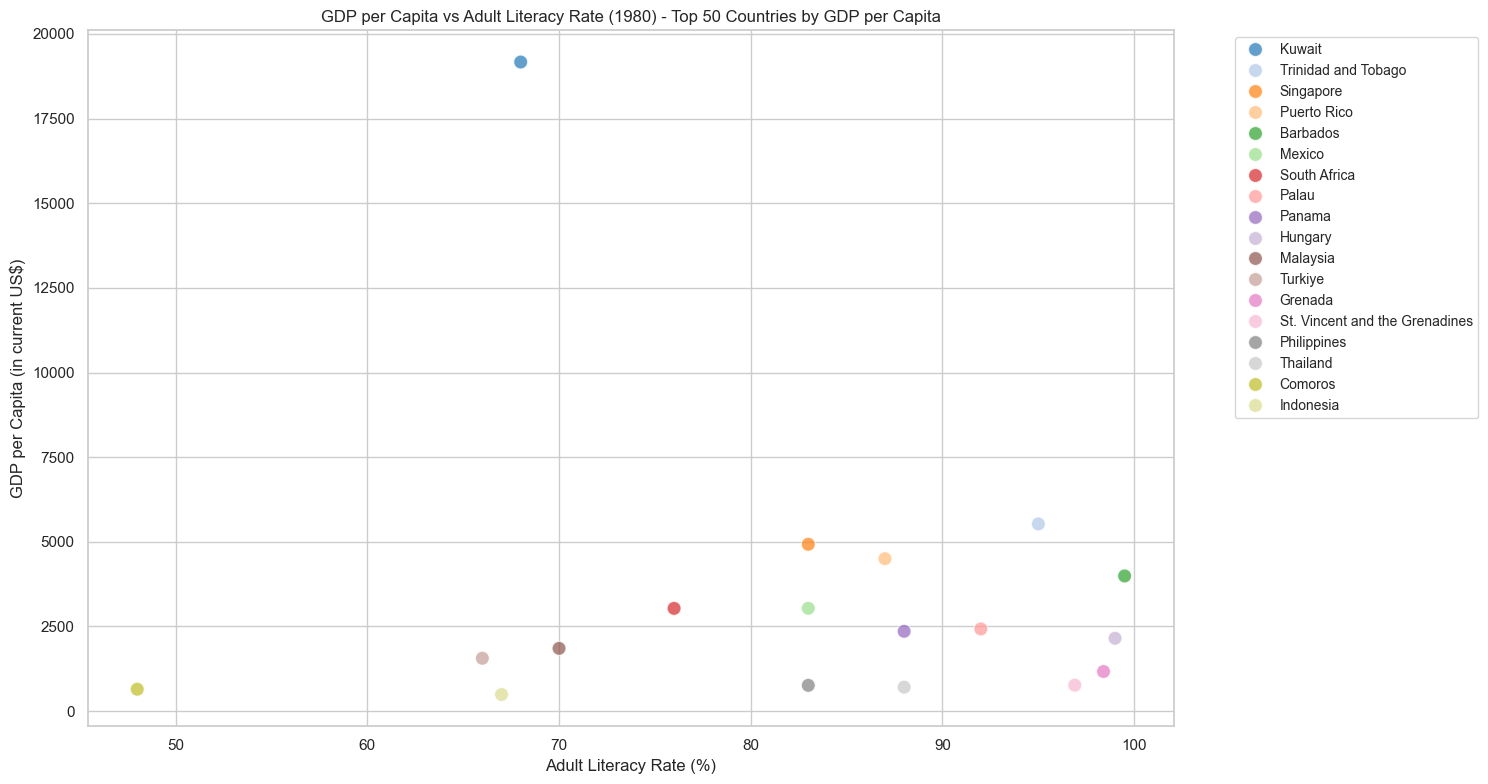

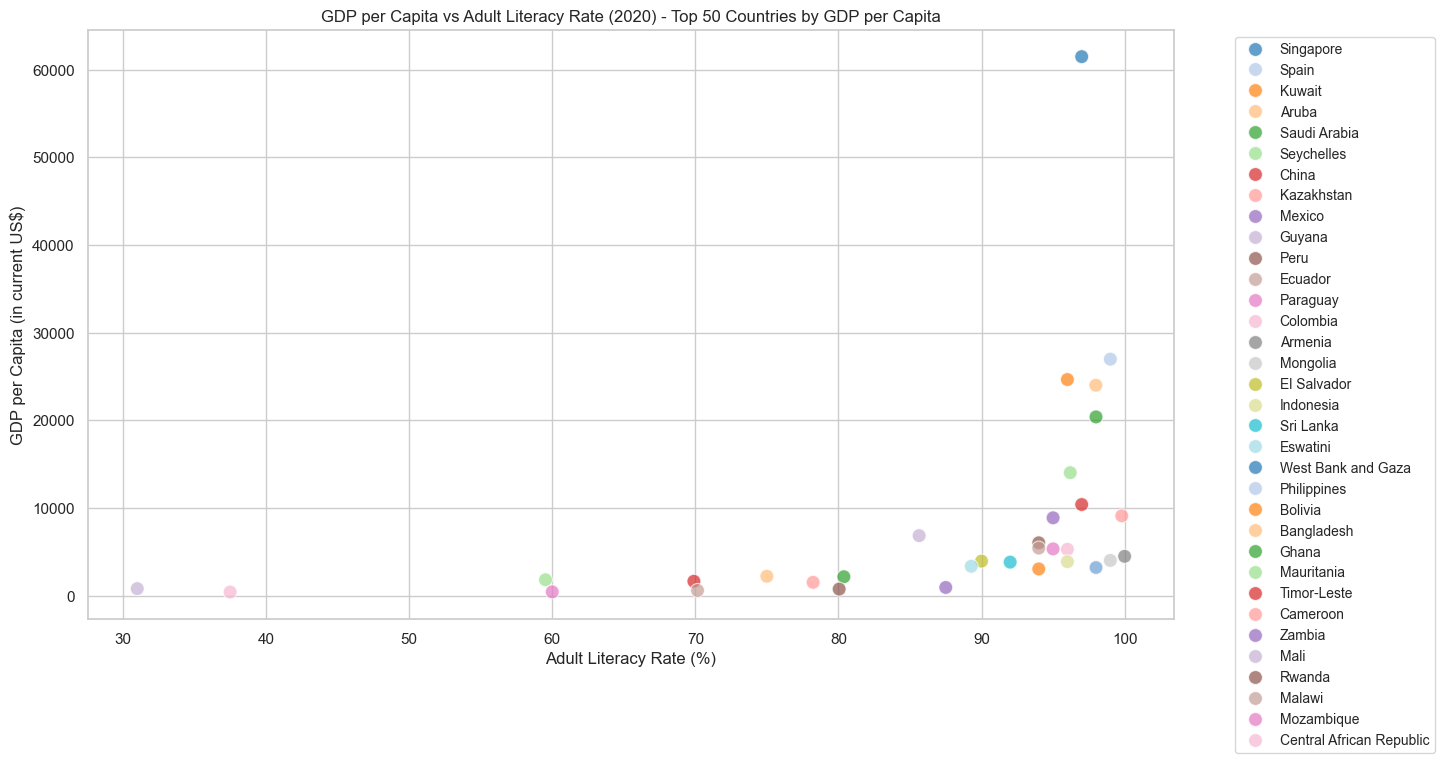

In [276]:
#create the scatter plots
def create_scatter_plot(data, year):
    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(
        data=data,
        x='Literacy_Rate',
        y='GDP_per_capita',
        hue='Country Name',
        palette='tab20',
        alpha=0.7,
        edgecolor='w',
        s=100
    )
    
    plt.xlabel('Adult Literacy Rate (%)')
    plt.ylabel('GDP per Capita (in current USD Billions)')
    plt.title(f'GDP per Capita vs Adult Literacy Rate ({year}) - Top 50 Countries by GDP per Capita')
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.show()

#scatter plot for 1980
create_scatter_plot(top_50_gdp_per_capita_1980, 1980)

#scatter plot for 2020
create_scatter_plot(top_50_gdp_per_capita_2020, 2020)

In [189]:
#calculate correlation coefficients for 1980 and 2020
corr_1980 = merged_data_1980['GDP_per_capita'].corr(merged_data_1980['Literacy_Rate'])
corr_2020 = merged_data_2020['GDP_per_capita'].corr(merged_data_2020['Literacy_Rate'])

print(f'Correlation between GDP per Capita and Literacy Rate in 1980: {corr_1980:.2f}')
print(f'Correlation between GDP per Capita and Literacy Rate in 2020: {corr_2020:.2f}')

Correlation between GDP per Capita and Literacy Rate in 1980: -0.12
Correlation between GDP per Capita and Literacy Rate in 2020: 0.37


4.1. Q1 Answer & Conclusion: 

Correlation in 1980: -0.12
A correlation value of -0.12 suggests a weak negative relationship between GDP per capita & literacy rate in 1980. A slightly negative value actually indicates GDP per capita and Literacy Rates might have even been inversely related however this is very unlikely and is likely due to other variables that have not been factored in this specific analysis.

Correlation in 2020: 0.37
A correlation value of 0.37 suggests a moderate positive relationship between GDP per capita & literacy rate in 2020. This indicates that, there may be a correlation between countries with higher literacy rates tend and having a higher GDP per capita. This is more in line with what is expected as over a 40 year period, it's likely that with greater economic development of countries and increased access to basic technology such as internet, would contribute to increased literacy rates and GDP.

The Change in Relationship: The change from a weak negative correlation in 1980 to a moderate positive correlation in 2020 indicates that over time the relationship between adult literacy rate and economic prosperity has strengthened over time for the top 50 countries which is expected.

4.2 Q2) For the top 5 countries that had the largest growth in Literacy Rate, has the correlation between GDP per capita improved, weakend or strengthened?

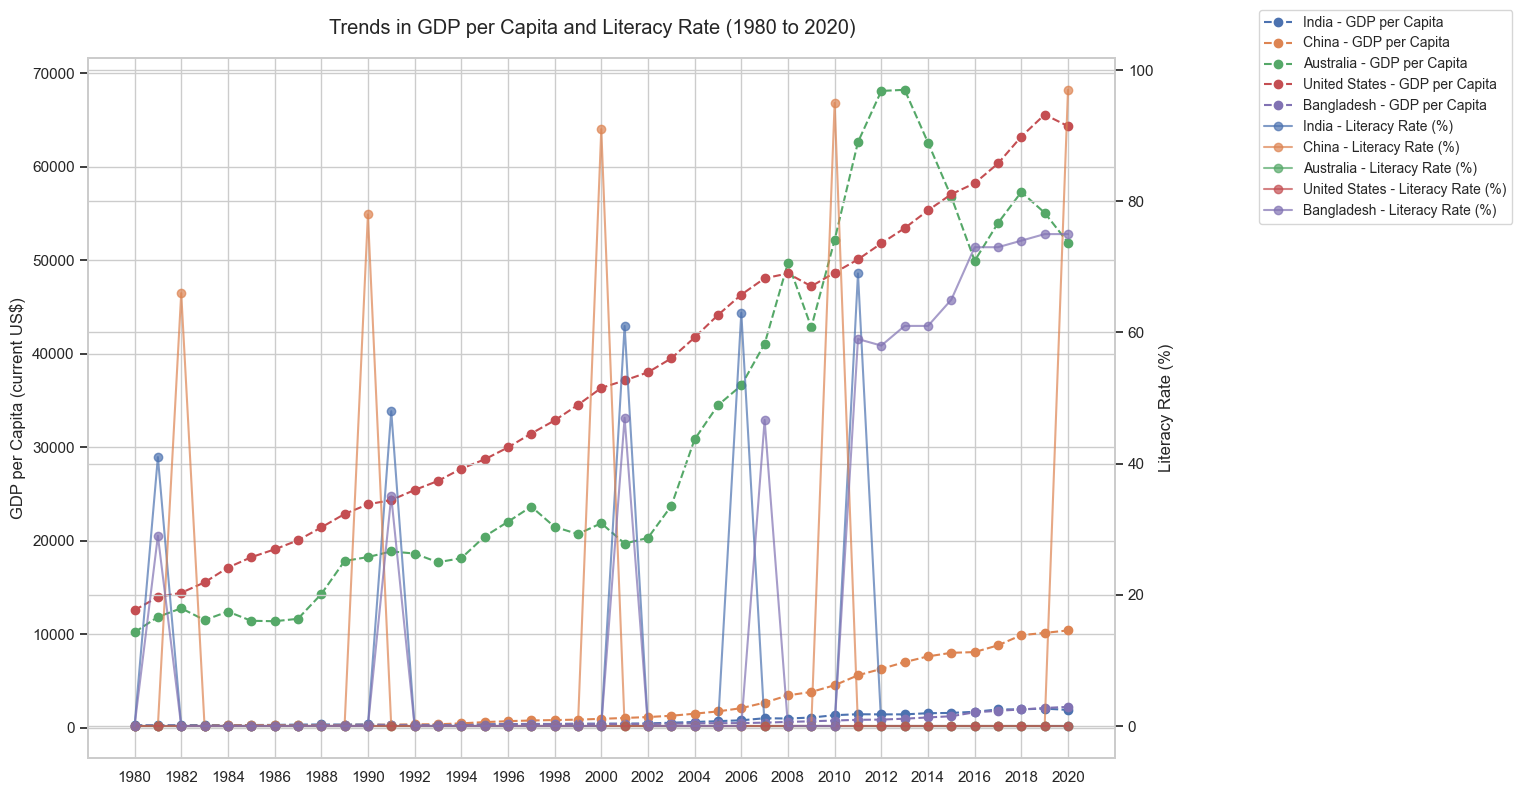

In [278]:
#load GDP per capita from population_cleaned_data
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]
gdp_data_all_years = population_data[(population_data['Series Name'] == 'GDP per capita (current US$)')]

#load Literacy Rate from literacy_data_cleaned
literacy_data_all_years = literacy_data_cleaned[(literacy_data_cleaned['Series Name'] == 'Adult Literacy Rate')]

#keep only relevant columns (all years from 1980 to 2020)
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range(1980, 2021)]
gdp_data_all_years = gdp_data_all_years[columns_to_keep]
literacy_data_all_years = literacy_data_all_years[columns_to_keep]

#merge GDP and Literacy Data for all years
merged_data_all_years = pd.merge(gdp_data_all_years, literacy_data_all_years, on=['Country Name', 'Country Code'], suffixes=('_GDP', '_Literacy'))

#convert columns back to numeric and handle missing values
for year in range(1980, 2021):
    merged_data_all_years[f'{year}_GDP'] = pd.to_numeric(merged_data_all_years[f'{year}_GDP'], errors='coerce')
    merged_data_all_years[f'{year}_Literacy'] = pd.to_numeric(merged_data_all_years[f'{year}_Literacy'], errors='coerce')

#remove columns that are non-numeric to be able to interpolate
non_numeric_cols = ['Country Name', 'Country Code']
numeric_data = merged_data_all_years.drop(columns=non_numeric_cols)

#fill missing values using interpolation and drop rows with missing values for GDP or Literacy
numeric_data.interpolate(method='linear', axis=1, inplace=True)
numeric_data.dropna(subset=[f'{year}_GDP' for year in range(1980, 2021)], inplace=True)
numeric_data.dropna(subset=[f'{year}_Literacy' for year in range(1980, 2021)], inplace=True)

#merge non-numeric columns back into the data
merged_data_all_years = pd.concat([merged_data_all_years[non_numeric_cols], numeric_data], axis=1)

#create the trend plots
def create_trend_plot(countries, merged_data):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  #create secondary axis
    
    years = [str(year) for year in range(1980, 2021)]
    for country in countries:
        country_data = merged_data[merged_data['Country Name'] == country]
        if not country_data.empty:
            ax1.plot(years, country_data.iloc[0][[f'{year}_GDP' for year in range(1980, 2021)]],
                     marker='o', label=f'{country} - GDP per Capita', linestyle='--', color=f'C{countries.index(country)}')
            ax2.plot(years, country_data.iloc[0][[f'{year}_Literacy' for year in range(1980, 2021)]],
                     marker='o', label=f'{country} - Literacy Rate (%)', linestyle='-', alpha=0.7, color=f'C{countries.index(country)}')

    plt.xticks(years[::2])
    plt.xlabel('Year')
    ax1.set_ylabel('GDP per Capita (current US$)')
    ax2.set_ylabel('Literacy Rate (%)')
    fig.suptitle('Trends in GDP per Capita and Literacy Rate (1980 to 2020)')
    fig.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#select what countries to include
selected_countries = ['India', 'China', 'Australia', 'United States', 'Bangladesh']
#plot the trends for selected countries
create_trend_plot(selected_countries, merged_data_all_years)

4.2.1 There appears to be lots of missing values particularly with Literacy Rates. Further investigation that a good selection of countries is required.

In [207]:
#check which years have available data for Literacy Rate above 1 for selected countries
available_data_years = {}

#iterate through the selected countries
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country Name'] == country]
    if not country_data.empty:
        #find years where Literacy Rate is greater than 1
        available_years = []
        for year in range(1980, 2021):
            column_name = f'{year}_Literacy'
            if column_name in country_data.columns:
                value = country_data[column_name].values[0]
                if pd.notna(value) and value > 1:
                    available_years.append(year)
        #store in the dictionary
        available_data_years[country] = available_years

#print available data count and years for each country
for country, years in available_data_years.items():
    if years:
        print(f'Available data for {country} with literacy rate: {len(years)} data points, Years: {years}')


Available data for India with literacy rate: 5 data points, Years: [1981, 1991, 2001, 2006, 2011]
Available data for China with literacy rate: 5 data points, Years: [1982, 1990, 2000, 2010, 2020]
Available data for Bangladesh with literacy rate: 14 data points, Years: [1981, 1991, 2001, 2007, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


4.2.2 Because of this, we can see that United States and Australia have no data during this time frame available new countries will have to be selected. These can be tested with the code below:

In [279]:
#keep only relevant columns and filter for selected countries
selected_countries = ['India', 'China', 'Pakistan', 'Turkiye', 'Bangladesh']
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range(1980, 2020)]

gdp_data = gdp_data_all_years.loc[gdp_data_all_years['Country Name'].isin(selected_countries), columns_to_keep]
literacy_data = literacy_data_all_years.loc[literacy_data_all_years['Country Name'].isin(selected_countries), columns_to_keep]

#merge GDP and Literacy Data for all years
merged_data = pd.merge(gdp_data, literacy_data, on=['Country Name', 'Country Code'], suffixes=('_GDP', '_Literacy'))

#convert columns to numeric and handle missing values
merged_data.update(merged_data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce'))

#check available data for Literacy Rate > 1 for selected countries
for country in selected_countries:
    country_data = merged_data[merged_data['Country Name'] == country]
    available_years = {
        year: {'GDP': country_data[f'{year}_GDP'].values[0], 'Literacy': country_data[f'{year}_Literacy'].values[0]}
        for year in range(1980, 2020) if country_data[f'{year}_Literacy'].values[0] > 1
    }
    print(f'Available data for {country}:')
    for year, values in available_years.items():
        print(f'  Year: {year}, GDP per Capita: {values["GDP"]}, Literacy Rate: {values["Literacy"]}')


Available data for India:
  Year: 1981, GDP per Capita: 271.4261492, Literacy Rate: 41.0
  Year: 1991, GDP per Capita: 303.850438, Literacy Rate: 48.0
  Year: 2001, GDP per Capita: 449.9103137, Literacy Rate: 61.0
  Year: 2006, GDP per Capita: 802.013742, Literacy Rate: 63.0
  Year: 2011, GDP per Capita: 1449.603301, Literacy Rate: 69.0
Available data for China:
  Year: 1982, GDP per Capita: 203.3349195, Literacy Rate: 66.0
  Year: 1990, GDP per Capita: 317.884673, Literacy Rate: 78.0
  Year: 2000, GDP per Capita: 959.3604314, Literacy Rate: 91.0
  Year: 2010, GDP per Capita: 4550.473944, Literacy Rate: 95.0
Available data for Pakistan:
  Year: 1981, GDP per Capita: 333.4583921, Literacy Rate: 26.0
  Year: 1998, GDP per Capita: 427.5063275, Literacy Rate: 43.0
  Year: 2005, GDP per Capita: 832.7511375, Literacy Rate: 50.0
  Year: 2006, GDP per Capita: 909.0324033, Literacy Rate: 54.0
  Year: 2007, GDP per Capita: 1012.182794, Literacy Rate: 52.0
  Year: 2008, GDP per Capita: 1087.51477

4.2.3. Now that we can see Pakistan and Turkiye have more complete data we can substitute these countries in to replace Australia and United States.


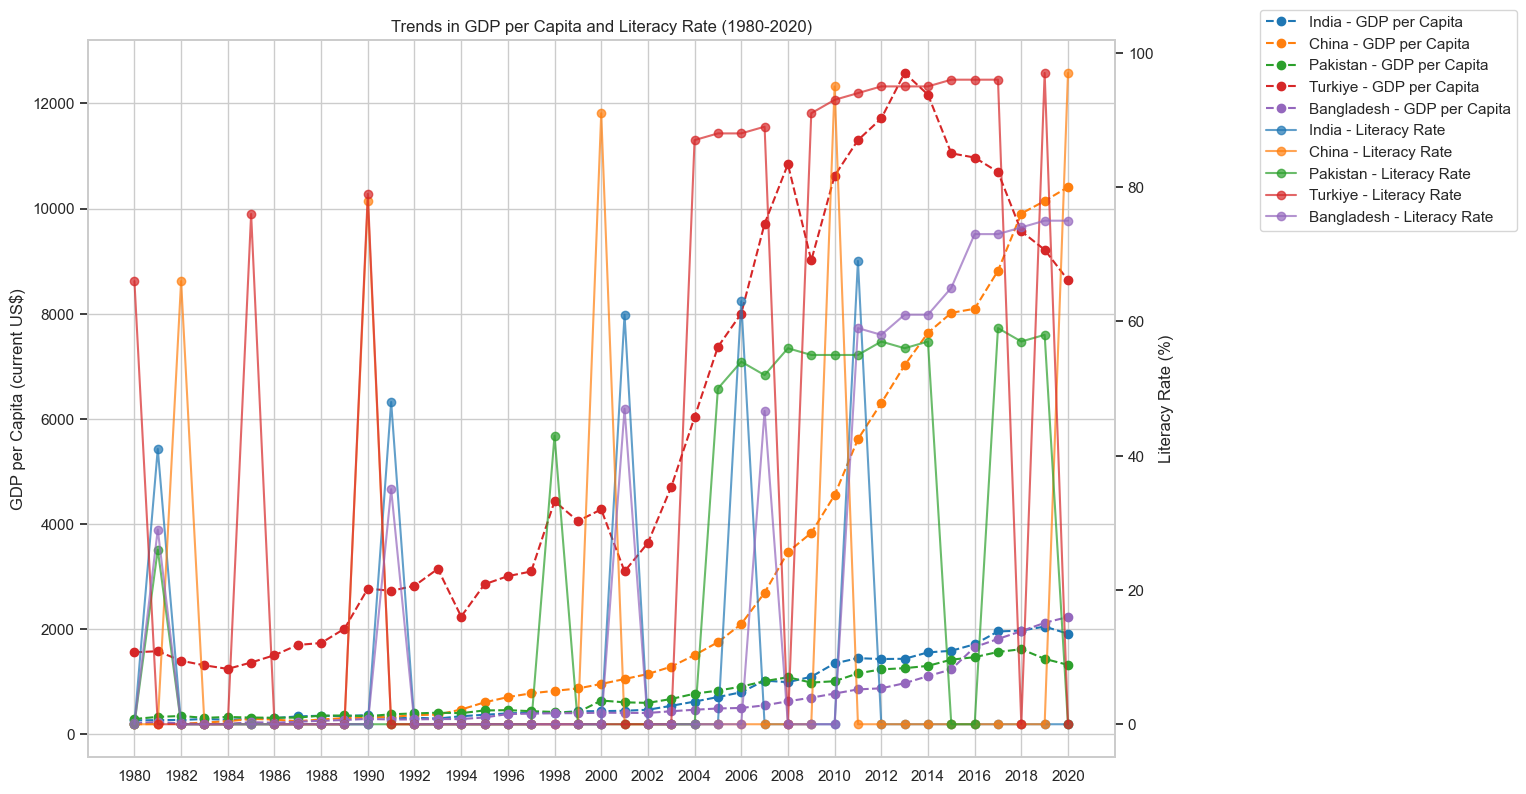

In [286]:
#load required data and select the year range
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]
gdp_data_all_years = population_data[(population_data['Series Name'] == 'GDP per capita (current US$)')]

#obtain Literacy Rate from literacy_data_cleaned
literacy_data_all_years = literacy_data_cleaned[(literacy_data_cleaned['Series Name'] == 'Adult Literacy Rate')]

#keep only relevant columns (all years from 1980 to 2020)
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range(1980, 2021)]
gdp_data_all_years = gdp_data_all_years[columns_to_keep]
literacy_data_all_years = literacy_data_all_years[columns_to_keep]

#merge GDP and Literacy Data for all years
merged_data_all_years = pd.merge(gdp_data_all_years, literacy_data_all_years, on=['Country Name', 'Country Code'], suffixes=('_GDP', '_Literacy'))

#convert columns to numeric and handle missing values
for year in range(1980, 2021):
    merged_data_all_years[f'{year}_GDP'] = pd.to_numeric(merged_data_all_years[f'{year}_GDP'], errors='coerce')
    merged_data_all_years[f'{year}_Literacy'] = pd.to_numeric(merged_data_all_years[f'{year}_Literacy'], errors='coerce')

#remove columns that are non-numeric (Country Name and Country Code) to allow for interpolation
non_numeric_cols = ['Country Name', 'Country Code']
numeric_data = merged_data_all_years.drop(columns=non_numeric_cols)

#fill missing values using interpolation and drop rows with missing for GDP or Adult Literacy
numeric_data.interpolate(method='linear', axis=1, inplace=True)
numeric_data.dropna(subset=[f'{year}_GDP' for year in range(1980, 2021)], inplace=True)
numeric_data.dropna(subset=[f'{year}_Literacy' for year in range(1980, 2021)], inplace=True)

#merge non-numeric columns back into the data
merged_data_all_years = pd.concat([merged_data_all_years[non_numeric_cols], numeric_data], axis=1)

#create line plots for GDP per Capita & Literacy Rate trends for selected countries
def create_trend_plot(countries, data):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  #create a secondary y-axis

    years = [str(year) for year in range(1980, 2021)]
    colors = plt.get_cmap('tab10')

    for i, country in enumerate(countries):
        country_data = data[data['Country Name'] == country]
        if not country_data.empty:
            ax1.plot(years, country_data.iloc[0][[f'{year}_GDP' for year in range(1980, 2021)]],
                     marker='o', linestyle='--', color=colors(i), label=f'{country} - GDP per Capita')
            ax2.plot(years, country_data.iloc[0][[f'{year}_Literacy' for year in range(1980, 2021)]],
                     marker='o', linestyle='-', alpha=0.7, color=colors(i), label=f'{country} - Literacy Rate')

    plt.xticks(years[::2], rotation=45)
    ax1.set_ylabel('GDP per Capita (current US$)')
    ax2.set_ylabel('Literacy Rate (%)')
    plt.title('Trends in GDP per Capita and Literacy Rate (1980-2020)')
    fig.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.grid(False)
    plt.show()

#define new selected countries to be plotted
new_selected_countries = ['India', 'China', 'Pakistan', 'Turkiye', 'Bangladesh']

#plot the trends
create_trend_plot(new_selected_countries, merged_data_all_years)


In [288]:
# Calculate and Print Correlation Coefficients by Country for Selected Countries
correlations_by_country = {}

for country in new_selected_countries:
    country_data = merged_data_all_years[merged_data_all_years['Country Name'] == country]
    gdp_values = country_data[[f'{year}_GDP' for year in range(1980, 2021)]].values.flatten()
    literacy_values = country_data[[f'{year}_Literacy' for year in range(1980, 2021)]].values.flatten()
    
    # Removing NaN values from the correlation calculation
    valid_indices = (~pd.isna(gdp_values)) & (~pd.isna(literacy_values))
    gdp_values = gdp_values[valid_indices]
    literacy_values = literacy_values[valid_indices]
    
    if len(gdp_values) > 1 and len(literacy_values) > 1:
        correlation = pd.Series(gdp_values).corr(pd.Series(literacy_values))
        correlations_by_country[country] = correlation

# Print correlation for each selected country
for country, correlation in correlations_by_country.items():
    print(f'Correlation between GDP per Capita and Literacy Rate for {country}: {correlation:.2f}')


Correlation between GDP per Capita and Literacy Rate for India: -0.04
Correlation between GDP per Capita and Literacy Rate for China: 0.10
Correlation between GDP per Capita and Literacy Rate for Pakistan: 0.67
Correlation between GDP per Capita and Literacy Rate for Turkiye: 0.70
Correlation between GDP per Capita and Literacy Rate for Bangladesh: 0.84


4.2.4 Q2 Answer and Conclusion: To further refine the readability of the above graph, values of 0 would be correctly removed for literacy data and only values above 1 would remain. The trend line would then connect for all available data over 1.

Negative Correlation: India is the only country that shows a negative correlation of -0.04 however this is near 0 and indicates that there is practically no consistent relationship between GDP per capita and literacy rate for India. based on the data analyzed, it's likely that factors other than economic growth may be influencing the literacy rate in India.

Positive Correlation: All other countries show positive correlation between GDP per capita and Adult Literacy Rate (China 0.1, Pakistan 0.67, Turkiye 0.7, Bangladesh). Most of these show correlation above 0.5 which suggests there is a relation between GDP per captita and Adult Literacy Rate and that, for these countries, economic policies are likely supporting education.

Although most countries saw a positive correlation between GDP per capita and Adult Literacy Rate, there are may other factors to consider including which may impact results as things such as government policy, education initiatives and school attendance can greatly vary country to country. Adding more of this data and performing regression analysis would likely yield more accurate results.

4.3 Q3) How have homicide rates evolved for the top 10 most affected countries from 1998 to 2020?

In [295]:
#filter for homicide rate from cleaned data
homicide_data = crime_data[(crime_data['Series Name'] == 'Intentional homicides (per 100,000 people)')]

#keep only relevant columns (1998 and 2020)
columns_to_keep = ['Country Name', 'Country Code', '1998', '2020']
homicide_data_years = homicide_data[columns_to_keep]

#convert homicide rates to numeric and handle any missing values
homicide_data_years.loc[:, '1998'] = pd.to_numeric(homicide_data_years['1998'], errors='coerce')
homicide_data_years.loc[:, '2020'] = pd.to_numeric(homicide_data_years['2020'], errors='coerce')

#filter out countries with missing values
homicide_data_years = homicide_data_years[(homicide_data_years['1998'] >= 1) & (homicide_data_years['2020'] >= 1)]

#get the top 10 countries with the highest Homicide Rate in 1998 and 2020
homicide_data_top10_1998 = homicide_data_years.nlargest(10, '1998')
homicide_data_top10_2020 = homicide_data_years.nlargest(10, '2020')

#check to see the top homicide rate was filtered and manipulated correctly
print("\n1998 Homicide Data")
print(homicide_data_top10_1998)
print("\n1998 Homicide Data")
print(homicide_data_top10_2020)


1998 Homicide Data
                       Country Name Country Code       1998       2020
52                      El Salvador          SLV  94.883971  21.310302
43                         Colombia          COL  60.849536  24.242763
170                    South Africa          ZAF  54.800028  33.964874
93                          Jamaica          JAM  33.338935  47.262205
84                        Guatemala          GTM  29.595765  18.960165
24                           Brazil          BRA  24.526455  22.384065
135                         Namibia          NAM  23.445335  12.173084
162              Russian Federation          RUS  22.721189   7.345966
178  St. Vincent and the Grenadines          VCT  21.022297  31.538958
3                           Albania          ALB  20.419683   2.127772

1998 Homicide Data
                       Country Name Country Code       1998       2020
93                          Jamaica          JAM  33.338935  47.262205
170                    South Africa  

4.3.1 Now we have verified the data we can begin plotting:

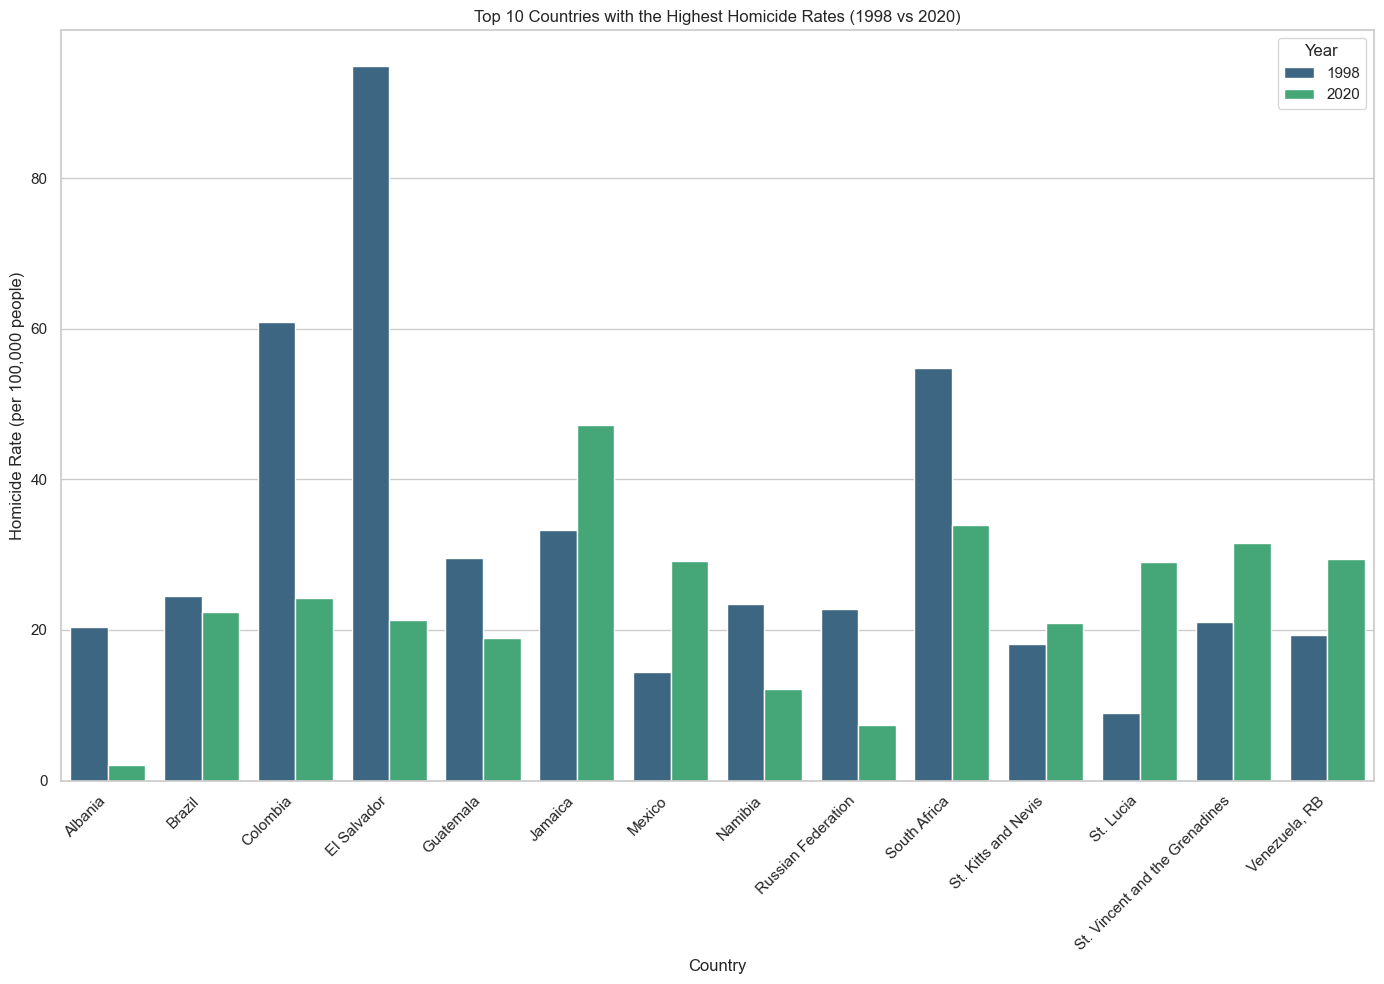

Countries with the most significant increase in homicide rates:
                       Country Name       1998       2020     Change
177                       St. Lucia   8.925441  29.011948  20.086507
121                          Mexico  14.410036  29.185314  14.775278
93                          Jamaica  33.338935  47.262205  13.923270
178  St. Vincent and the Grenadines  21.022297  31.538958  10.516661
198                   Venezuela, RB  19.358556  29.427401  10.068845

Countries with the most significant decrease in homicide rates:
           Country Name       1998       2020     Change
162  Russian Federation  22.721189   7.345966 -15.375223
3               Albania  20.419683   2.127772 -18.291911
170        South Africa  54.800028  33.964874 -20.835154
43             Colombia  60.849536  24.242763 -36.606772
52          El Salvador  94.883971  21.310302 -73.573669


In [299]:
#plot grouped bar chart for the top 10 countries with the highest Homicide Rates in 1998 and 2020
countries = list(set(homicide_data_top10_1998['Country Name']).union(set(homicide_data_top10_2020['Country Name'])))
homicide_top10_combined = homicide_data_years[homicide_data_years['Country Name'].isin(countries)]

#sort data by country name for consistent plotting and grouping
homicide_top10_combined = homicide_top10_combined.sort_values(by='Country Name')

#melt data to convert 1998 and 2020 into the year column for seaborn plotting
homicide_top10_melted = pd.melt(homicide_top10_combined, id_vars=['Country Name'], value_vars=['1998', '2020'],
                                 var_name='Year', value_name='Homicide Rate')

#plot the data
plt.figure(figsize=(14, 10))
sns.barplot(data=homicide_top10_melted, x='Country Name', y='Homicide Rate', hue='Year', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Homicide Rate (per 100,000 people)')
plt.title('Top 10 Countries with the Highest Homicide Rates (1998 vs 2020)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#identify countries with the most significant changes in homicide rates
homicide_top10_combined['Change'] = homicide_top10_combined['2020'] - homicide_top10_combined['1998']
most_significant_changes = homicide_top10_combined.sort_values(by='Change', ascending=False)

#print countries with the most significant increase and decrease in homicide rates
print("Countries with the most significant increase in homicide rates:")
print(most_significant_changes.head(5)[['Country Name', '1998', '2020', 'Change']])
print("\nCountries with the most significant decrease in homicide rates:")
print(most_significant_changes.tail(5)[['Country Name', '1998', '2020', 'Change']])


4.3.2. Q3 Answer & Conclusion:

There are some notable changes in homicide rates for many countries between 1998 to 2020. Some countries have more than doubled in homicide rates and some countries have more than halved their homicide rates. It's worth noting that there are many reasons as to why homicide rates may increase or decrease, such as government policy, socio-political changes, geo-political changes and more. 

St Lucia was thew country that saw the most significant change overall for Homicide Rates. It more than doubled from 8.9 to 29. This is in part due to the very small population size of St Lucia (~180,000 people) and increasing gang violence that is being left unchecked (Thomas, 2023).

El Salvador was the country that saw the most significant decrease in Homicide Rates, likely due to successful measures to reduce crime, such as effective law enforcement, public safety policies, or socio-economic improvements which may have all contributed to homicide rates reducing the most. This aligns with the recent news coverage of El Salvador cracking down on gang crimes (Papadovassilakis, 2023).

Brazil is the country that saw the least amount of change in Homicide Rates between 1980 and 2020, suggesting that despite any potential variables, high levels of violence remain a persistent issue.

4.4. Q4) Which countries have the highest number of people living in extreme poverty, and how does this compare to their countries GDP?

Filtered Poverty Data:
       Country Name Country Code  2000  2001  2002  2003  2004  2005  2006  \
434     Afghanistan          AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
435         Albania          ALB   0.0   0.0  25.4   0.0   0.0  18.5   0.0   
436         Algeria          DZA   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
437  American Samoa          ASM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
438         Andorra          AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     2007  ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
434  33.7  ...  38.3   0.0   0.0   0.0   0.0  54.5   0.0   0.0   0.0   0.0  
435   0.0  ...   0.0   0.0   0.0   0.0   0.0  23.7  23.4  23.0  21.8  22.0  
436   0.0  ...   5.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
437   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
438   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 23 columns]
Top 5 Countries with th

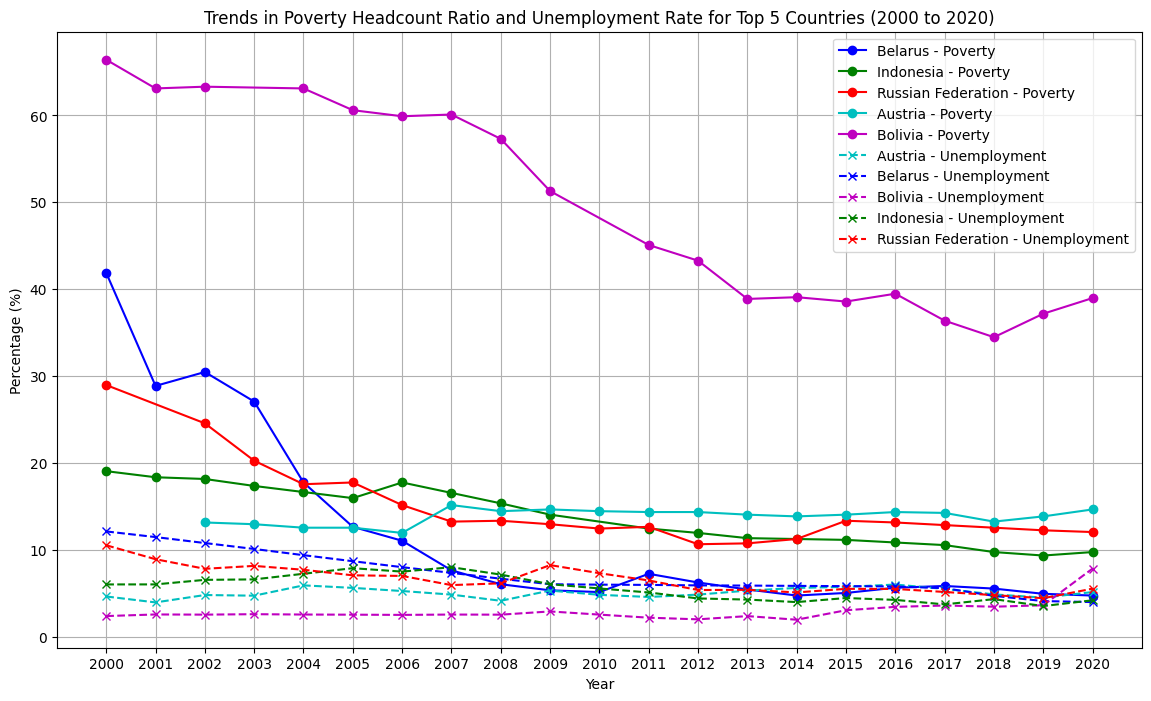

Correlation between Poverty and Unemployment for Belarus: 0.93
Correlation between Poverty and Unemployment for Indonesia: 0.62
Correlation between Poverty and Unemployment for Russian Federation: 0.43
Correlation between Poverty and Unemployment for Austria: 0.41
Correlation between Poverty and Unemployment for Bolivia: -0.14


In [213]:
#obtain relevant data for analysis
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]

#filter for Poverty Headcount Ratio
data_columns = ['Country Name', 'Country Code', 'Series Name'] + [str(year) for year in range(2000, 2021)]
filtered_data = population_data[data_columns]

#extract Poverty headcount ratio
poverty_data = filtered_data[filtered_data['Series Name'] == 'Poverty headcount ratio at national poverty lines (% of population)']

#keep only relevant columns (Country Name, Country Code, all years from 2000 to 2020)
poverty_data = poverty_data[['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2021)]]

#convert columns to numeric and any handle missing values
for year in range(2000, 2021):
    poverty_data[str(year)] = pd.to_numeric(poverty_data[str(year)], errors='coerce').fillna(0)

#filter out rows where all year values are less than or equal to 1 as these represent missing values
poverty_data = poverty_data[(poverty_data.loc[:, [str(year) for year in range(2000, 2021)]] > 1).any(axis=1)]

#find the top 5 countries with the most complete data (i.e., most non-zero values from 2000 to 2020)
poverty_data['count_non_zero'] = (poverty_data.loc[:, [str(year) for year in range(2000, 2021)]] > 1).sum(axis=1)
top_5_countries = poverty_data.nlargest(5, 'count_non_zero')

#obtain Unemployment Data from crime_cleaned_data
crime_data = crime_data_cleaned.loc[:, ~crime_data_cleaned.columns.duplicated()]

#filter for Unemployment data
unemployment_data = crime_data[crime_data['Series Name'] == 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

#keep only relevant columns (Country Name, Country Code, all years from 2000 to 2020)
unemployment_data = unemployment_data[['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2021)]]

#convert columns to numeric and handle missing values
for year in range(2000, 2021):
    unemployment_data[str(year)] = pd.to_numeric(unemployment_data[str(year)], errors='coerce').fillna(0)

#filter unemployment data to match the top 5 countries
top_5_unemployment = unemployment_data[unemployment_data['Country Name'].isin(top_5_countries['Country Name'])]

#plot trend graph for Poverty Headcount Ratio and Unemployment over time
plt.figure(figsize=(14, 8))
years = [str(year) for year in range(2000, 2021)]
colors = ['b', 'g', 'r', 'c', 'm']
color_map = dict(zip(top_5_countries['Country Name'], colors))

for _, row in top_5_countries.iterrows():
    country_name = row['Country Name']
    available_years = [year for year in years if row[year] > 1]
    available_values = [row[year] for year in available_years]
    plt.plot(available_years, available_values, label=f'{country_name} - Poverty', marker='o', linestyle='-', color=color_map[country_name])

for _, row in top_5_unemployment.iterrows():
    country_name = row['Country Name']
    available_years = [year for year in years if row[year] > 1]
    available_values = [row[year] for year in available_years]
    plt.plot(available_years, available_values, label=f'{country_name} - Unemployment', marker='x', linestyle='--', color=color_map[country_name])

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Trends in Poverty Headcount Ratio and Unemployment Rate for Top 5 Countries (2000 to 2020)')
plt.legend()
plt.grid(True)
plt.show()

#calculate correlation between Poverty Headcount Ratio and Unemployment Rate for each country
for country in top_5_countries['Country Name']:
    poverty_values = top_5_countries[top_5_countries['Country Name'] == country].iloc[:, 2:-1].values.flatten()
    unemployment_values = top_5_unemployment[top_5_unemployment['Country Name'] == country].iloc[:, 2:].values.flatten()
    poverty_values = poverty_values[~pd.isna(poverty_values)]
    unemployment_values = unemployment_values[~pd.isna(unemployment_values)]
    if len(poverty_values) > 1 and len(unemployment_values) > 1:
        correlation, _ = pearsonr(poverty_values, unemployment_values)
        print(f'Correlation between Poverty and Unemployment for {country}: {correlation:.2f}')


The correlations between poverty and unemployment for the five countries are as follows:

Belarus: A strong positive correlation (0.93) shows poverty and unemployment move closely together—when one rises, so does the other. Indonesia: A correlation of 0.62 indicates a strong link, though other factors may influence poverty levels. Russia: A moderate correlation (0.43) suggests a noticeable but weaker connection. Austria: Similar to Russia, with a moderate positive correlation of 0.41. Bolivia: A slight negative correlation (-0.14) implies poverty and unemployment are not closely linked, pointing to other influencing factors. Overall, most countries show a positive link between unemployment and poverty, but the strength of this relationship varies, likely due to differing economic conditions and social policies.

Q5) What is the relationship between births attended by a skilled health staff and poverty rates

In [303]:
#load relevant data for Poverty Headcount Ratio and Births Attended by Skilled Health Staff
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]

data_columns = ['Country Name', 'Country Code', 'Series Name'] + [str(year) for year in range(2000, 2021)]
filtered_data = population_data[data_columns]

#obtain Poverty Headcount Ratio and Births Attended by Skilled Health Staff
df_poverty = filtered_data[filtered_data['Series Name'] == 'Poverty headcount ratio at national poverty lines (% of population)']
df_births = filtered_data[filtered_data['Series Name'] == 'Births attended by skilled health staff (% of total)']

#keep only relevant columns (Country Name, Country Code, all years from 2000 to 2020)
df_poverty = df_poverty[['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2021)]]
df_births = df_births[['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2021)]]

#convert columns to numeric and handle missing values
for year in range(2000, 2021):
    df_poverty[str(year)] = pd.to_numeric(df_poverty[str(year)], errors='coerce')
    df_births[str(year)] = pd.to_numeric(df_births[str(year)], errors='coerce')

#print the first few rows of the datasets to troubleshoot
print("Filtered Poverty Data:")
print(df_poverty.head())
print("Filtered Births Attended Data:")
print(df_births.head())

#filter out rows to omit missing data and ensure there is enough workable data
df_poverty['count_valid'] = (df_poverty.loc[:, [str(year) for year in range(2000, 2021)]] > 1).sum(axis=1)
df_births['count_valid'] = (df_births.loc[:, [str(year) for year in range(2000, 2021)]] > 1).sum(axis=1)

#keep only countries with at least 15 years of valid data
df_poverty = df_poverty[df_poverty['count_valid'] >= 15]
df_births = df_births[df_births['count_valid'] >= 15]

#print the filtered datasets to see if any data remains
print("Filtered Poverty Data After Removing Incomplete Rows:")
print(df_poverty.head())
print("Filtered Births Attended Data After Removing Incomplete Rows:")
print(df_births.head())

#find the top 3 countries with the most complete data for both indicators
df_poverty = df_poverty[['Country Name', 'Country Code', 'count_valid'] + [str(year) for year in range(2000, 2021)]]
df_births = df_births[['Country Name', 'Country Code', 'count_valid'] + [str(year) for year in range(2000, 2021)]]

#find common countries in both datasets
common_countries = pd.merge(df_poverty, df_births, on=['Country Name', 'Country Code'], suffixes=('_poverty', '_births'))
common_countries['count_valid'] = common_countries[['count_valid_poverty', 'count_valid_births']].min(axis=1)

#get the top 3 countries with the most complete data
top_3_countries = common_countries.nlargest(3, 'count_valid')

#print the top 3 countries with the most complete data
print("Top 3 Countries with the Most Complete Data:")
print(top_3_countries[['Country Name', 'Country Code', 'count_valid']])

Filtered Poverty Data:
       Country Name Country Code  2000  2001  2002  2003  2004  2005  2006  \
434     Afghanistan          AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
435         Albania          ALB   0.0   0.0  25.4   0.0   0.0  18.5   0.0   
436         Algeria          DZA   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
437  American Samoa          ASM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
438         Andorra          AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     2007  ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
434  33.7  ...  38.3   0.0   0.0   0.0   0.0  54.5   0.0   0.0   0.0   0.0  
435   0.0  ...   0.0   0.0   0.0   0.0   0.0  23.7  23.4  23.0  21.8  22.0  
436   0.0  ...   5.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
437   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
438   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 23 columns]
Filtered Births Attende

4.5.1 Now we have manipulated the data to omit incomplete values we can see which are the top 3 countries with the most complete data which we can use to plot the data into a graph.

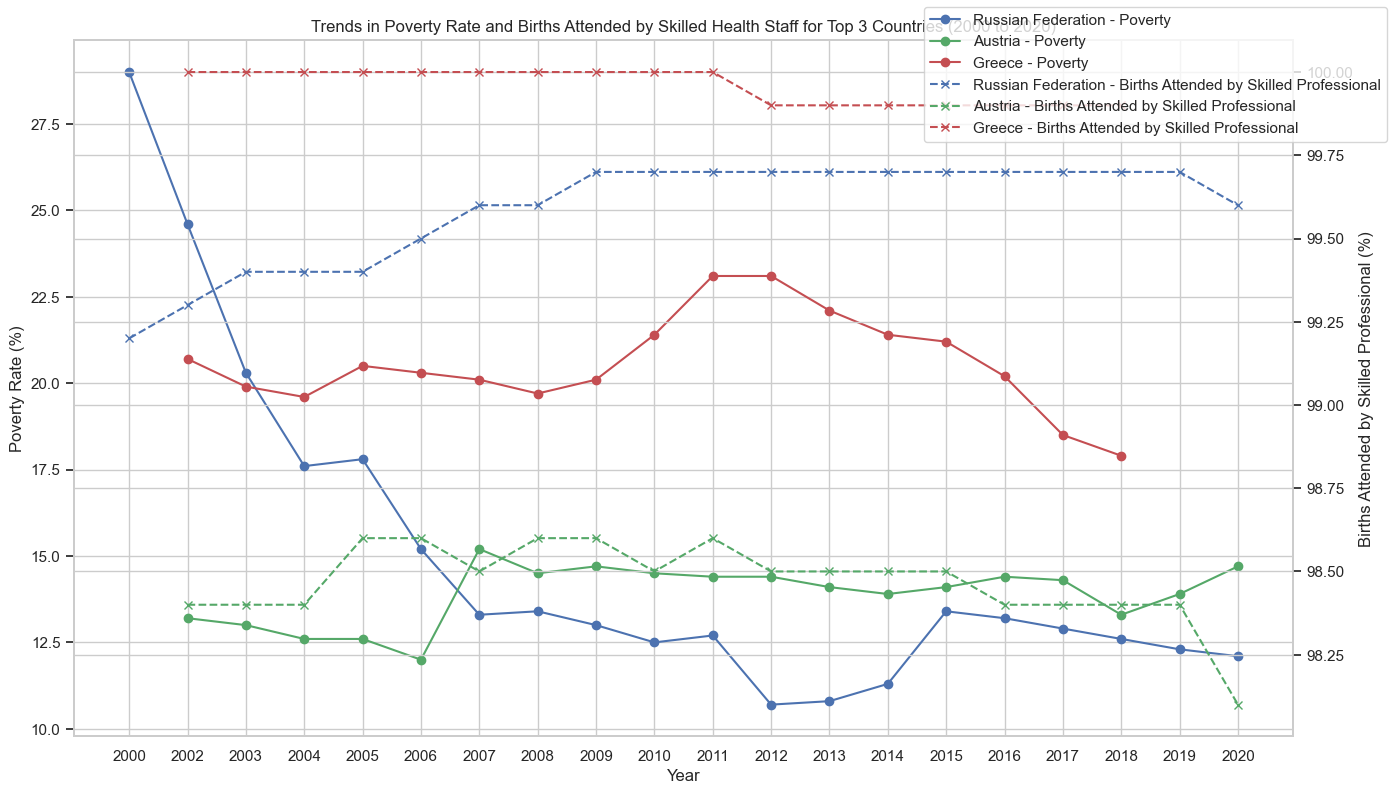

Correlation between Poverty Rate and Births Attended by Skilled Health Staff for Russian Federation: -0.94
Correlation between Poverty Rate and Births Attended by Skilled Health Staff for Austria: -0.11
Correlation between Poverty Rate and Births Attended by Skilled Health Staff for Greece: -0.03


In [304]:
#plot trend graph
years = [str(year) for year in range(2000, 2021)]
colors = ['b', 'g', 'r']
color_map = dict(zip(top_3_countries['Country Name'], colors))

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

for _, row in top_3_countries.iterrows():
    country_name = row['Country Name']
    poverty_values = row[[f'{year}_poverty' for year in years]].values.astype(float)
    births_values = row[[f'{year}_births' for year in years]].values.astype(float)
    
    #ensure we're filtering out values of 0 as a precaution
    valid_indices = (poverty_values > 0) & (births_values > 0)
    poverty_values = poverty_values[valid_indices]
    births_values = births_values[valid_indices]
    valid_years = [year for i, year in enumerate(years) if valid_indices[i]]
    
    ax1.plot(valid_years, poverty_values, label=f'{country_name} - Poverty', marker='o', linestyle='-', color=color_map[country_name])
    ax2.plot(valid_years, births_values, label=f'{country_name} - Births Attended by Skilled Professional', marker='x', linestyle='--', color=color_map[country_name])

#customize the graph
ax1.set_xlabel('Year')
ax1.set_ylabel('Poverty Rate (%)')
ax2.set_ylabel('Births Attended by Skilled Professional (%)')
plt.title('Trends in Poverty Rate and Births Attended by Skilled Health Staff for Top 3 Countries (2000 to 2020)')
fig.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for _, row in top_3_countries.iterrows():
    country_name = row['Country Name']
    poverty_values = row[[f'{year}_poverty' for year in years]].values.astype(float)
    births_values = row[[f'{year}_births' for year in years]].values.astype(float)
    
    #ensure all missing values are removed
    valid_indices = ~pd.isna(poverty_values) & ~pd.isna(births_values) & (poverty_values > 0) & (births_values > 0)
    poverty_values = poverty_values[valid_indices]
    births_values = births_values[valid_indices]
    
    if len(poverty_values) > 1 and len(births_values) > 1:
        correlation, _ = pearsonr(poverty_values, births_values)
        print(f'Correlation between Poverty Rate and Births Attended by Skilled Health Staff for {country_name}: {correlation:.2f}')

Q4.5.2 Answers and Conclusions:

The strength of the correlation differs across countries, however, based on the countries analysed it appears there's next to no correlation between Poverty Rate and Births Attended by Skilled Health Staff expect for the Russian Federation. This saw a strong correlation of -0.94 which suggestions that as the births attended by skilled health staff increased, the poverty rate decreased. Because this is an inverse relationship, in reality, it's probably more accurate in saying that as poverty rates decreased more people had access to better healthcare which resulted in an increase in births by a skilled health staff.

4.6. Q6) What is the population growth trend over time in countries with the 5 highest vs. 5 lowest life expectancy?

In [313]:
#load data for Population Growth and Life Expectancy
population_data = population_data_cleaned.loc[:, ~population_data_cleaned.columns.duplicated()]

#otain Population Growth and Life Expectancy Data
growth_data = population_data[(population_data['Series Name'] == 'Population growth (annual %)')]
life_expectancy_data = population_data[(population_data['Series Name'] == 'Life expectancy at birth, total (years)')]

#keep only relevant columns (all years from 1980 to 2020)
columns_to_keep = ['Country Name', 'Country Code'] + [str(year) for year in range(1980, 2021)]
growth_data = growth_data[columns_to_keep]
life_expectancy_data = life_expectancy_data[columns_to_keep]

#calculate average life expectancy for each country over the specified years
life_expectancy_data['average_life_expectancy'] = life_expectancy_data.loc[:, '1980':'2020'].mean(axis=1)

#identify the 5 countries with the highest & lowest life expectancy
highest_life_expectancy_countries = life_expectancy_data.nlargest(5, 'average_life_expectancy')['Country Name']
lowest_life_expectancy_countries = life_expectancy_data.nsmallest(5, 'average_life_expectancy')['Country Name']

#calculate average growth for each country over the specified years
growth_data['average_growth'] = growth_data.loc[:, '1980':'2020'].mean(axis=1)

#filter population growth data for the identified countries
highest_growth_data = growth_data[growth_data['Country Name'].isin(highest_life_expectancy_countries)]
lowest_growth_data = growth_data[growth_data['Country Name'].isin(lowest_life_expectancy_countries)]

#double check values
highest_growth_data = highest_growth_data.sort_values(by='average_growth', ascending=False)
print("Top 5 (Highest Growth):")
print(highest_growth_data[['Country Name', 'average_growth']].head(5))

lowest_growth_data = lowest_growth_data.sort_values(by='average_growth', ascending=True)
print("Bottom 5 (Lowest Growth):")
print(lowest_growth_data[['Country Name', 'average_growth']].head(5))

Top 5 (Highest Growth):
             Country Name  average_growth
333      Macao SAR, China        2.470456
304               Iceland        1.181795
302  Hong Kong SAR, China        1.017289
405           Switzerland        0.772038
314                 Japan        0.209048
Bottom 5 (Lowest Growth):
                 Country Name  average_growth
347                    Monaco        0.778385
220            American Samoa        0.891709
380                San Marino        1.165633
221                   Andorra        2.005676
362  Northern Mariana Islands        2.684712


4.6.1 Now that we have manipulated the data to show the top 5 and bottom 5, we can plot them on separate graphs to aid with analysis:

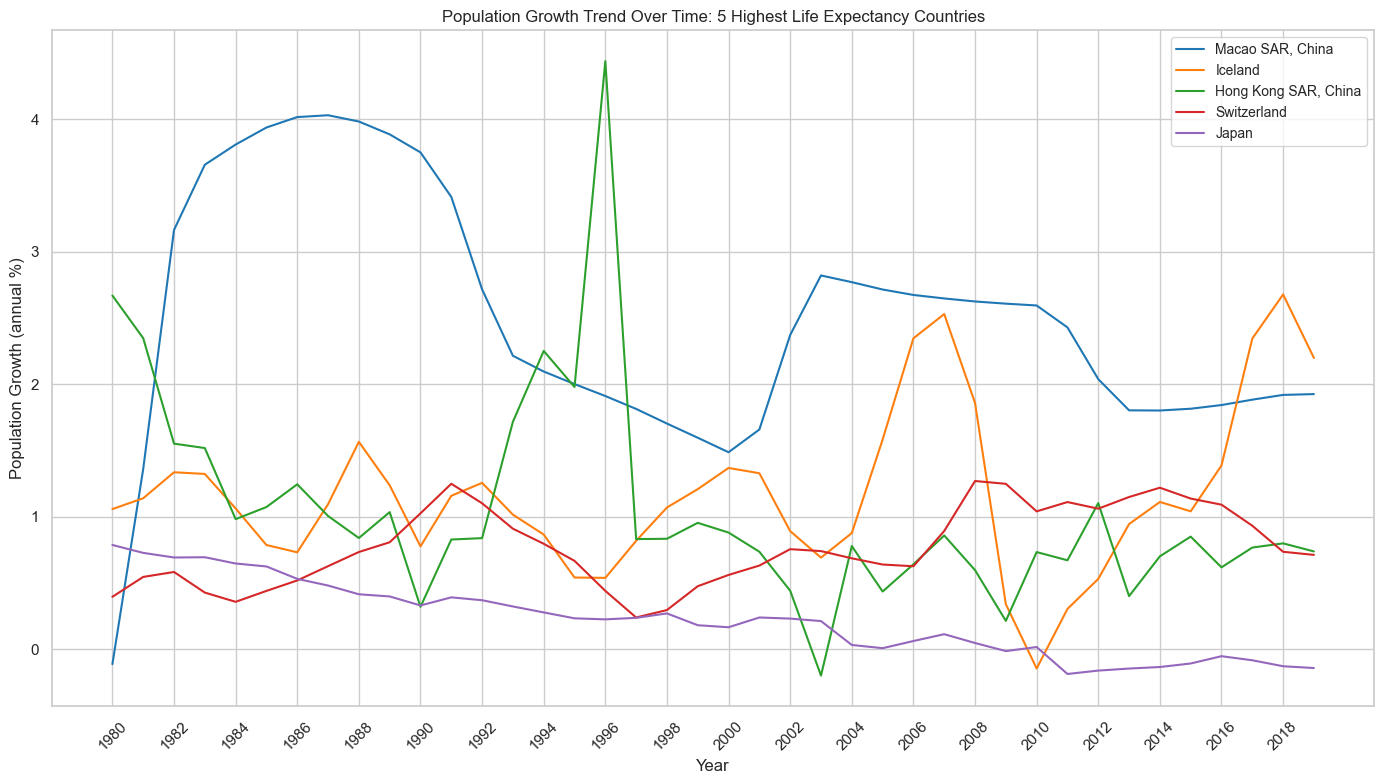

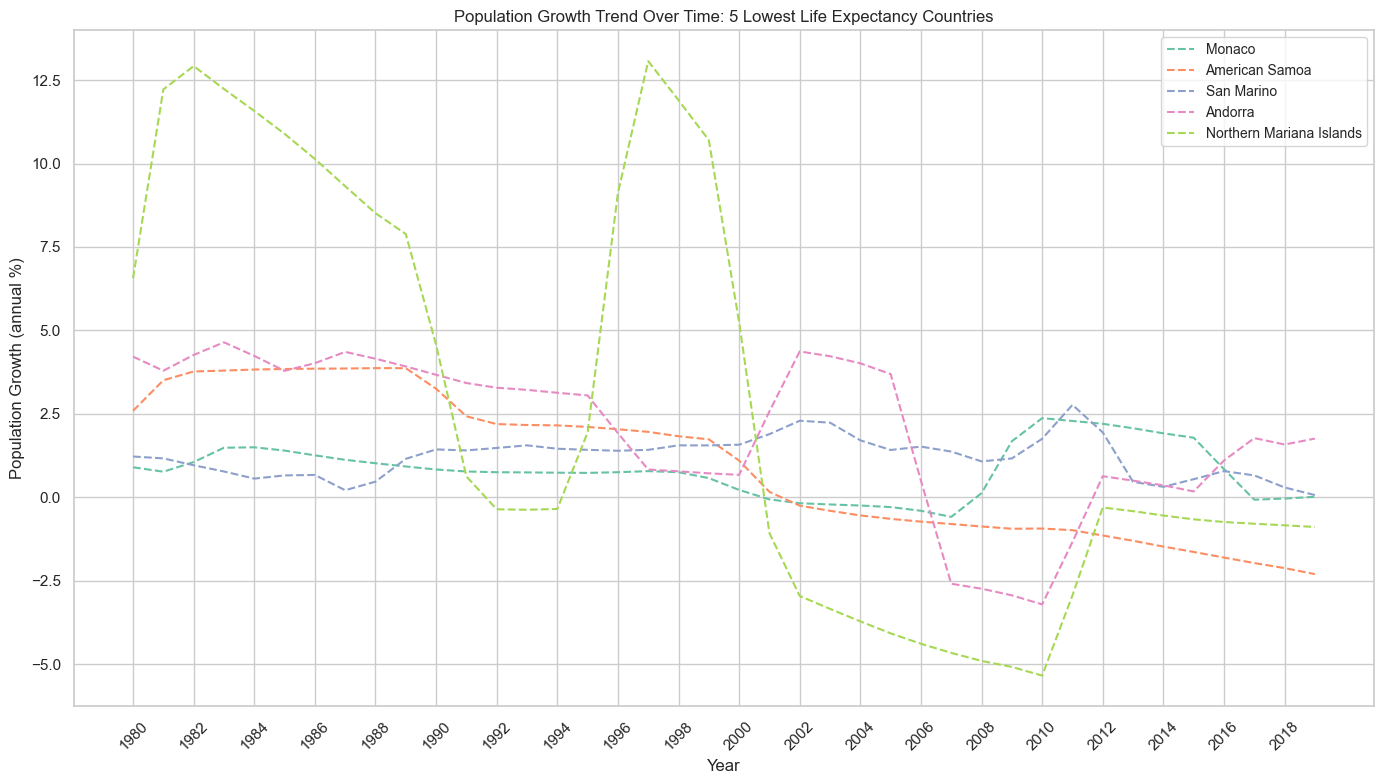


Correlation Analysis:
Correlation between Population Growth and Life Expectancy for Japan: -0.97
Correlation between Population Growth and Life Expectancy for Hong Kong SAR, China: -0.48
Correlation between Population Growth and Life Expectancy for Macao SAR, China: -0.38
Correlation between Population Growth and Life Expectancy for Iceland: 0.23
Correlation between Population Growth and Life Expectancy for Switzerland: 0.52
Correlation between Population Growth and Life Expectancy for American Samoa: nan
Correlation between Population Growth and Life Expectancy for Andorra: nan
Correlation between Population Growth and Life Expectancy for Monaco: nan
Correlation between Population Growth and Life Expectancy for Northern Mariana Islands: nan
Correlation between Population Growth and Life Expectancy for San Marino: nan


C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\steve\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\lib\

In [318]:
#plot population growth trend over time for the HIGHEST life expectancy countries using Seaborn
years = [str(year) for year in range(1980, 2020)]

fig, ax = plt.subplots(figsize=(14, 8))

#define the data for plotting
highest_growth_data_melted = highest_growth_data.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='Population Growth')

#convert Year to numeric for plotting
highest_growth_data_melted['Year'] = pd.to_numeric(highest_growth_data_melted['Year'])

#plot using unique colours for increased readability
palette_high = sns.color_palette("tab10", len(highest_life_expectancy_countries))
sns.lineplot(data=highest_growth_data_melted, x='Year', y='Population Growth', hue='Country Name', markers=True, dashes=False, palette=palette_high, ax=ax)

#customize graph
plt.xticks(ticks=range(1980, 2020, 2), rotation=45)  # Show every 2 years for readability
plt.xlabel('Year')
plt.ylabel('Population Growth (annual %)')
plt.title('Population Growth Trend Over Time: 5 Highest Life Expectancy Countries')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

#plot population growth trend over time for the LOWEST life expectancy countries using Seaborn
fig, ax = plt.subplots(figsize=(14, 8))

#define the data for plotting
lowest_growth_data_melted = lowest_growth_data.melt(id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='Population Growth')

#convert Year to numeric for plotting
lowest_growth_data_melted['Year'] = pd.to_numeric(lowest_growth_data_melted['Year'])

#plot using unique colours for increased readability
palette_low = sns.color_palette("Set2", len(lowest_life_expectancy_countries))
sns.lineplot(data=lowest_growth_data_melted, x='Year', y='Population Growth', hue='Country Name', markers=True, linestyle='--', palette=palette_low, ax=ax)

#customize graph
plt.xticks(ticks=range(1980, 2020, 2), rotation=45)  # Show every 2 years for readability
plt.xlabel('Year')
plt.ylabel('Population Growth (annual %)')
plt.title('Population Growth Trend Over Time: 5 Lowest Life Expectancy Countries')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

#perform correlation for Population Growth and Life Expectancy
print("\nCorrelation Analysis:")
for country in highest_life_expectancy_countries:
    country_growth_data = highest_growth_data[highest_growth_data['Country Name'] == country].iloc[:, 2:].T
    country_life_expectancy_data = life_expectancy_data[life_expectancy_data['Country Name'] == country].iloc[:, 2:-1].T
    correlation = country_growth_data.corrwith(country_life_expectancy_data.iloc[:, 0]).values[0]
    print(f'Correlation between Population Growth and Life Expectancy for {country}: {correlation:.2f}')

for country in lowest_life_expectancy_countries:
    country_growth_data = lowest_growth_data[lowest_growth_data['Country Name'] == country].iloc[:, 2:].T
    country_life_expectancy_data = life_expectancy_data[life_expectancy_data['Country Name'] == country].iloc[:, 2:-1].T
    correlation = country_growth_data.corrwith(country_life_expectancy_data.iloc[:, 0]).values[0]
    print(f'Correlation between Population Growth and Life Expectancy for {country}: {correlation:.2f}')

4.6.2 Answer and Conclusion:
Japan: The strong negative correlation of -0.97 indicates that as life expectancy has risen, population growth has declined. This aligns with the aging population issue Japan has been facing over recent years (Edmond & North, 2023)

Hong Kong, China, and Macao: With moderate negative correlations of -0.48 and -0.38, respectively, these regions also show a link between rising life expectancy and decreasing population growth. However, the relationship isn’t as pronounced as in Japan.

Iceland and Switzerland: Positive correlations of 0.23 and 0.52 suggest that rising life expectancy in these countries might be tied to slight increases in population growth. This could reflect unique factors like higher immigration rates, which can influence both population growth and life expectancy however the correlation is only considered moderate and would require more variables to test again to further cement this statement.

5. Future Analysis:
Overall, the results of this analysis suggest some high correlation between certain economic factors and even some inverse relationships between others. These results give a good proxy of the types of socio-economic relationships at play between certain countries and how they have evolved over the last 40 years. To further increase the reliability and accuracy of the results there are other aspects worth investigating deeper:

Casual Relationships: Further exploration into the relationships between poverty, healthcare access, and other economic indicators to better understand potential causal connections.

Regional Comparisons: How does results change when looking at groups of countries based on the geographic location. Are there localized factors that impact metrics such as poverty and unemployment?

Additional Data: Incorporating more data into each analysis and also performing multi linear regression analysis may help solidify results against more variables.

References:

Edmond, C. and North, M. (2023) More than 1 in 10 people in #Japan are aged 80 or over. here’s how its ageing population is reshaping the country, World Economic Forum. Available at: https://www.weforum.org/stories/2023/09/elderly-oldest-population-world-japan/ (Accessed: 01 December 2024). 

Papadovassilakis, A. (2024) ‘too many soldiers’: How Bukele’s crackdown succeeded where others failed, InSight Crime. Available at: https://insightcrime.org/investigations/too-many-soldiers-how-bukele-crackdown-succeeded-where-others-failed/ (Accessed: 01 December 2024). 

Thomas, F. (2023) What is contributing to St. Lucia’s spike in violent crime?, Global Voices. Available at: https://globalvoices.org/2023/03/28/what-is-contributing-to-st-lucias-spike-in-violent-crime/ (Accessed: 01 December 2024). 

World development indicators - Crime Data (no date) DataBank. Available at: https://databank.worldbank.org/Crime-rate/id/e67da82# (Accessed: 01 December 2024). 

World development indicators - Literacy rate, adult total (% of people ages 15 and above) (no date) DataBank. Available at: https://databank.worldbank.org/source/world-development-indicators# (Accessed: 02 December 2024). 

World development indicators - Population Data (no date) DataBank. Available at: https://databank.worldbank.org/source/world-development-indicators (Accessed: 01 December 2024).